# Telecom Churn Prediction
### Buiness Problem: The main objective of the project is to build a predictive model that will generate the list of customer most vulnerable to churn.
- Source: # https://www.kaggle.com/puja19/telcom-customer-churn

### Dataset Description:
- Target variable | **Churn**:  Customer who stop doing business with the company.

Numerical Variables
- SeniorCitizen: States whether Customer is a Senior Citizen or not.
- tenure: Number of Months the Customer has stayed with the Company.
- MonthlyCharges: The amount that the Customer pays monthly.
- TotalCharges:  The total amount has been charged by the customer.

Categorical Variables
- Partner: Whether the customer has a partner or not (Yes, No)
- Dependents: Whether the customer has dependents or not (Yes, No)
- PhoneService: Whether the customer has a phone service or not (Yes, No)
- MultipleLines: Whether the customer has multiple lines or not (Yes, No, No phone service)
- InternetService: Customer’s internet service provider (DSL, Fiber optic, No)
- OnlineSecurity: Whether the customer has online security or not (Yes, No, No internet service)
- OnlineBackup: Whether the customer has online backup or not (Yes, No, No internet service)
- DeviceProtection: Whether the customer has device protection or not (Yes, No, No internet service)
- TechSupport: Whether the customer has tech support or not from business (Yes, No, No internet service)
- StreamingTV: Whether the customer has streaming TV or not service (Yes, No, No internet service)
- StreamingMovies: Whether the customer has streaming movies or not service (Yes, No, No internet service)
- Contract: The contract term of the customer with business(Month-to-month, One year, Two years)
- PaperlessBilling: Whether the customer has paperless billing or not (Yes, No)
- PaymentMethod: The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))


### Importing Packages

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import suptitle
import sklearn
import sklearn.ensemble
from sklearn.model_selection import (train_test_split, GridSearchCV)
from sklearn.metrics import roc_curve
import sklearn.metrics as metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score, accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings("ignore")

### Setup Variable

In [2]:
# Set the global default size of matplotlib figures
plt.rc('figure', figsize=(10, 5))

# Size of matplotlib figures that contain subplots
fizsize_with_subplots = (10, 10)

# Size of matplotlib histogram bins
bin_size = 10

### Explore that Data

In [113]:
# Read the raw data
raw_data = pd.read_csv('original_raw_classification_data.csv')

Raw data has 7043 rows and 21 columns before processing.

In [4]:
raw_data.shape

(7043, 21)

In [5]:
raw_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [6]:
raw_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [7]:
raw_data.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [8]:
raw_data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

 - Convert the **TotalCharges** into float to explore this variable. As the value in the actual column is numerical

In [9]:
raw_data['TotalCharges'] = pd.to_numeric(raw_data['TotalCharges'], errors='coerce')

In [10]:
#Removing customer IDs from the data set the columns not used in the predictive model.
#As this is has unique value and not useful in Machine Leanrning
raw_data = raw_data.drop("customerID", axis=1)

In [11]:
# Impute the missing/ blank spaces with NAN values
empty_cols=['gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection','TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']
for i in empty_cols:
    raw_data[i]=raw_data[i].replace(" ",np.nan)

In [12]:
# Percentage of Missing values in the dataset
percent_missing = raw_data.isnull().sum() / len(raw_data)
missing_value_df = pd.DataFrame({'column_name': raw_data.columns,
                                 'percent_missing': percent_missing})
#more than 5% are the missing value in the total charge
missing_value_df

,column_name,percent_missing
gender,gender,0.000000
SeniorCitizen,SeniorCitizen,0.000000
Partner,Partner,0.000000
Dependents,Dependents,0.000000
tenure,tenure,0.000000
PhoneService,PhoneService,0.000000
MultipleLines,MultipleLines,0.000000
InternetService,InternetService,0.000000
OnlineSecurity,OnlineSecurity,0.000000
OnlineBackup,OnlineBackup,0.000000


- From the above percentage we can see that **TotalCharges** has more than 0.15% missing values. Only one column has missing values so will impute it Randomly across all the dataset and check the percentage of missing values.

## Synthetically injecting missing values to the specific column.
The below code randomly inject missing values and keeping the missing proportion to be 5% for that column
Since original data has only one column with missing values. So in order to(as per project requirement) maintain the 5% missing value trend across 5 columns. Synthetically injecting missing values across these columns(**numerical and categorical**):


In [13]:
import numpy as np
import random
new_data = raw_data.copy()
null_proportion = 0.06
for c in ['tenure', 'OnlineSecurity','OnlineBackup', 'PaperlessBilling', 'PaymentMethod']:
    specific_indices = random.sample(new_data.index.values.tolist(), int(null_proportion * len(new_data)))
    new_data.loc[new_data.index.isin(specific_indices), c] = np.nan

In [14]:
# Saving the new missing file in the cvs file format
new_data.to_csv('modified_classification_data.csv')

In [15]:
# Basic Information about the new DataFrame with datatypes
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            6621 non-null   float64
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    6621 non-null   object 
 9   OnlineBackup      6621 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  6621 non-null   object 
 16  PaymentMethod     6621 non-null   object 


Descriptive statistics on the DataFrame:

In [16]:
#Statistically describing numerical columns in the new Dataset
new_data.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,6621.000000,7043.000000,7032.000000
mean,0.162147,32.451291,64.761692,2283.300441
std,0.368612,24.584719,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,56.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


## Missing Value Check

In [17]:
for i in empty_cols:
    new_data[i]=new_data[i].replace(" ",np.nan)
# Percentage of Missing values in the dataset
percent_missing = new_data.isnull().sum() / len(new_data)
missing_value_df = pd.DataFrame({'column_name': new_data.columns,
                                 'percent_missing': percent_missing})
missing_value_df

,column_name,percent_missing
gender,gender,0.000000
SeniorCitizen,SeniorCitizen,0.000000
Partner,Partner,0.000000
Dependents,Dependents,0.000000
tenure,tenure,0.059918
PhoneService,PhoneService,0.000000
MultipleLines,MultipleLines,0.000000
InternetService,InternetService,0.000000
OnlineSecurity,OnlineSecurity,0.059918
OnlineBackup,OnlineBackup,0.059918


### New Data Contain more than 5% of missing values across all dataset with minimum 5 column. Satisfying the base requiremement of assignment

# Target Variable Distribution

Mapping Binary Target variable( Churn ) to 0 and 1 where:
- **0** -> Denotes Customers who haven't churn and instance in raw data is "No"
- **1** -> Denotes Customers who haven churn and instance in raw data is "Yes"

In [18]:
# Target Variable
new_data['Churn'] = new_data["Churn"].apply(lambda x: 0 if x=='No' else 1).astype(int)

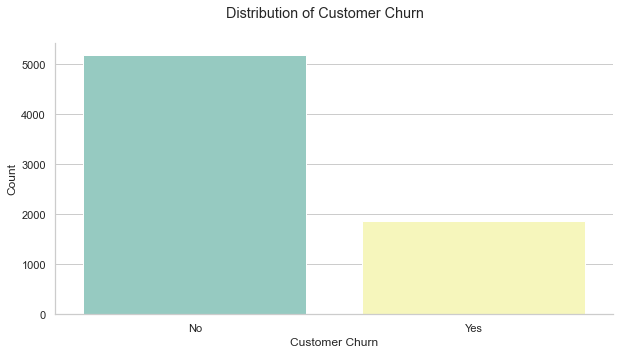

In [19]:
from seaborn import despine
sns.set(style="whitegrid")

ax=sns.countplot(x='Churn',palette="Set3", data=new_data)
ax.set_xticklabels(["No","Yes"])
ax.set_ylabel("Count")
ax.set_xlabel("Customer Churn")
suptitle("Distribution of Customer Churn")
despine()

**Insights**
-  We can observe from the bar chart there is significant amount of imbalance in the feature between **Yes** and **No**.
- **Imbalance** in the dataset

# Exploratory Data Analysis & Data Imputation

## Feature: Gender

In [20]:
new_data['gender'].value_counts()

Male      3555
Female    3488
Name: gender, dtype: int64

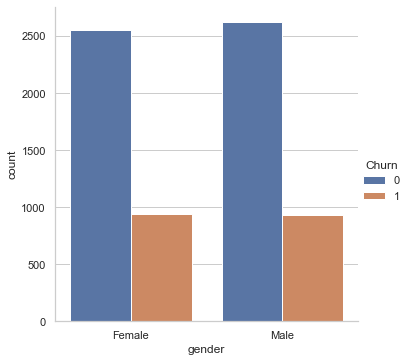

In [21]:
gender_churn = new_data[['gender', 'Churn']].groupby(['gender', 'Churn']).size().reset_index(name='count')
sns.factorplot(x = 'gender', y='count', hue='Churn', data=gender_churn, kind='bar')
plt.show()

**Insights**
- There isn't a significant difference b/w male and female population's churn/no-churn count

In [22]:
# Number of missing value - No missing Value
new_data['gender'].isnull().sum()

0

## Feature: SeniorCitizen

In [23]:
new_data['SeniorCitizen'].value_counts()

0    5901
1    1142
Name: SeniorCitizen, dtype: int64

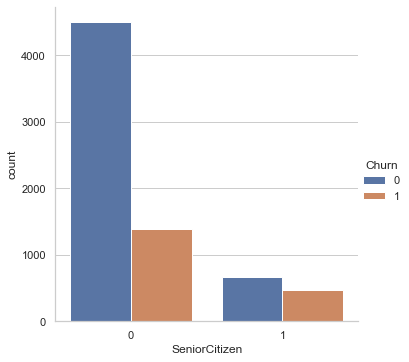

In [24]:
senior_citizen_churn = new_data[['SeniorCitizen', 'Churn']].groupby(['SeniorCitizen', 'Churn']).size().reset_index(name='count')
sns.factorplot(x = 'SeniorCitizen', y='count', hue='Churn', data=senior_citizen_churn, kind='bar')
plt.show()

**Insights**
- It's clearly evident that senior citizens aren't the majority customer base for the telecom company. Also, the non-senior citizen population (senior citizen=0) has significantly higher population which hasn't churned.

In [25]:
# Number of missing value
new_data['SeniorCitizen'].isnull().sum()

0

## Feature: Partner

In [26]:
new_data['Partner'].value_counts()

No     3641
Yes    3402
Name: Partner, dtype: int64

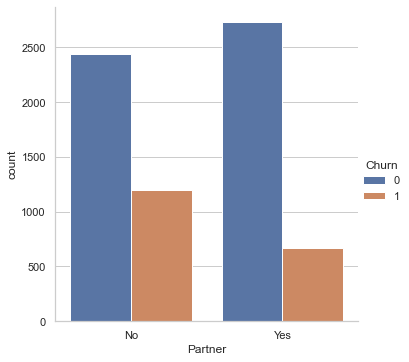

In [27]:
partner_churn = new_data[['Partner', 'Churn']].groupby(['Partner', 'Churn']).size().reset_index(name='count')
sns.factorplot(x = 'Partner', y='count', hue='Churn', data=partner_churn, kind='bar')
plt.show()

**Insights**
- Clearly, the customers with 'partners' seem to retain (churn=0) with the company better compared to the ones who don't have a partner.

In [28]:
# Number of missing value
new_data['Partner'].isnull().sum()

0

## Feature: Dependents

In [29]:
new_data['Dependents'].value_counts()

No     4933
Yes    2110
Name: Dependents, dtype: int64

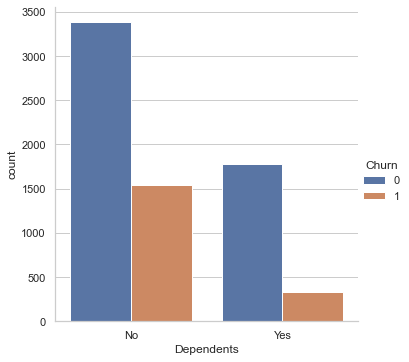

In [30]:
dependents_churn = new_data[['Dependents', 'Churn']].groupby(['Dependents', 'Churn']).size().reset_index(name='count')
sns.factorplot(x = 'Dependents', y='count', hue='Churn', data=dependents_churn, kind='bar')
plt.show()

**Insights**
- Individuals without dependents seem to be a bigger customer base for the company. At the same time, this segment seems to have higher churn-rate as well compared to the ones who don't have dependents.

In [31]:
# Number of missing value
new_data['Dependents'].isnull().sum()

0

## Feature: tenure

In [32]:
new_data['tenure'].describe()

count    6621.000000
mean       32.451291
std        24.584719
min         0.000000
25%         9.000000
50%        29.000000
75%        56.000000
max        72.000000
Name: tenure, dtype: float64

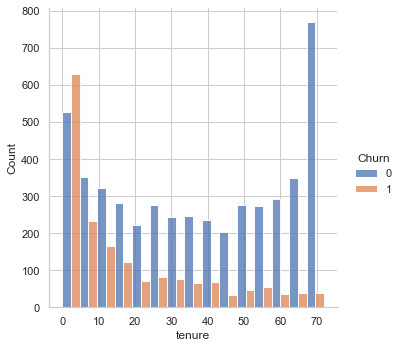

In [33]:
sns.displot(new_data, x='tenure', hue='Churn', multiple='dodge')
plt.show()

**Insights**
- As we observe above, majority of the customer-churn happens under 10 months of their association with the company. Customers who haven't churned yet, obviously have significantly high tenure period (~70 months)

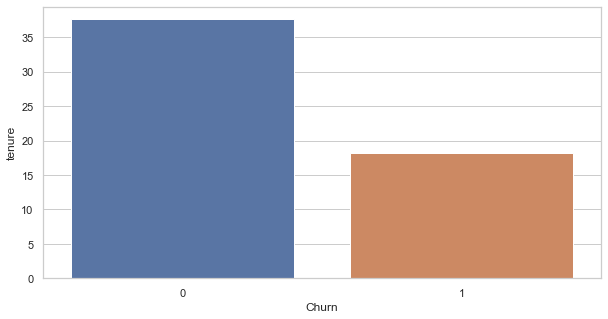

In [34]:
tenure_churn = new_data[['tenure', 'Churn']].groupby(['Churn']).mean('tenure').reset_index()
sns.barplot(x=tenure_churn['Churn'], y=tenure_churn['tenure'])
plt.show()

**Insights**
- From the above plot, we can clearly see how the average tenure of a churned customer is almost half of a non-churned customer.


In [35]:
# Number of missing value
new_data['tenure'].isnull().sum()

422

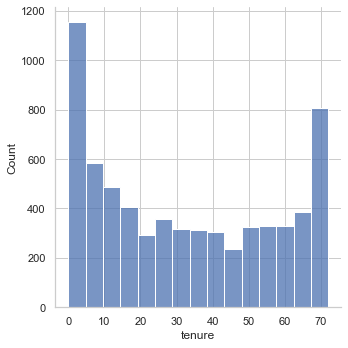

In [36]:
# Tenure Distribution
sns.displot(new_data, x='tenure')
plt.show()

### Imputation Technique
From the above distribution we can see that Tenure Variable is not skewed.
- **Mean**: **Will be right imputation technique**. Since there is not much skewness in the data and no outlier. Using Mean will be one of the appropriate way to impute missing values
- **Median**: Will not be the right imputation techniques for this variable. From the above data we can see that feature is not highly influenced by the Outlier[max value = 72 months].
- **Mode**: Will not be the right imputation techniques for this variable. Mode is  used to impute missing values in columns which are categorical in nature.But when it comes to continuous data then mode can create ambiguities.


In [37]:
# Imputing the Tenure with the mean0 of the variable
new_data['tenure'] = new_data['tenure'].replace(np.nan, new_data['tenure'].mean())

In [38]:
# Number of missing value
new_data['tenure'].isnull().sum()

0

## Feature: PhoneService

In [39]:
new_data['PhoneService'].value_counts()

Yes    6361
No      682
Name: PhoneService, dtype: int64

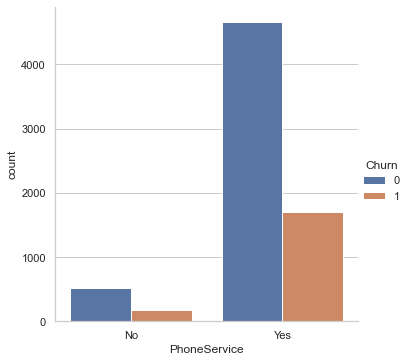

In [40]:
phone_churn = new_data[['PhoneService', 'Churn']].groupby(['PhoneService', 'Churn']).size().reset_index(name='count')
sns.factorplot(x = 'PhoneService', y='count', hue='Churn', data=phone_churn, kind='bar')
plt.show()

**Insights**
- There are very few customers who dont' have the Phone Service. Majority of them have it and are company's current customers as well.

In [41]:
# Number of missing value
new_data['PhoneService'].isnull().sum()

0

## Feature: MultipleLines

In [42]:
new_data['MultipleLines'].value_counts()

No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64

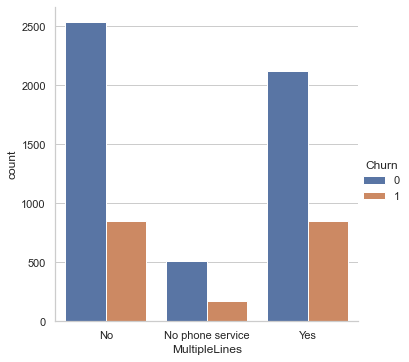

In [43]:
multipleLines_churn = new_data[['MultipleLines', 'Churn']].groupby(['MultipleLines', 'Churn']).size().reset_index(name='count')
sns.factorplot(x = 'MultipleLines', y='count', hue='Churn', data=multipleLines_churn, kind='bar')
plt.show()

**Insights**
- Customers who churned didn't seem differentiate much between having 'multiple phone lines' or not. Whereas, there's higher
proportion of individuals didn't churn and aren't using 'multiple phone lines'

In [44]:
# Number of missing value
new_data['MultipleLines'].isnull().sum()

0

## Feature: InternetService

In [45]:
new_data['InternetService'].value_counts()

Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64

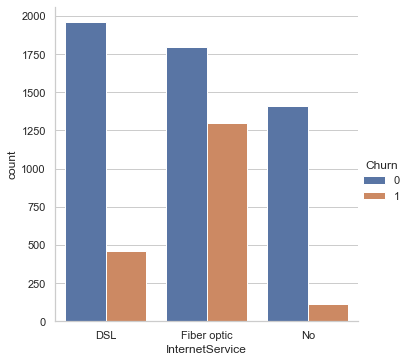

In [46]:
internet_service_churn = new_data[['InternetService', 'Churn']].groupby(['InternetService', 'Churn']).size().reset_index(name='count')
sns.factorplot(x = 'InternetService', y='count', hue='Churn', data=internet_service_churn, kind='bar')
plt.show()

**Insights**
- Amongst the people who churned, majority of them used the 'Fiber Optic' internet service. Whereas, amongst the ones who did not churn, the majority of them are using DSL as the internet service

In [47]:
# Number of missing value
new_data['InternetService'].isnull().sum()

0

## Feature: OnlineSecurity

In [48]:
new_data['OnlineSecurity'].value_counts()

No                     3280
Yes                    1899
No internet service    1442
Name: OnlineSecurity, dtype: int64

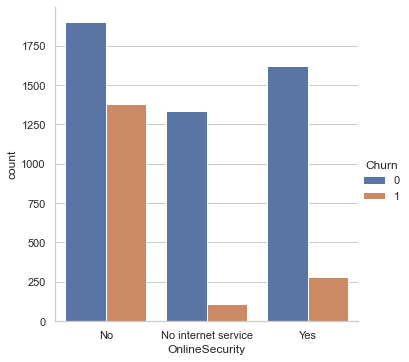

In [49]:
online_security_churn = new_data[['OnlineSecurity', 'Churn']].groupby(['OnlineSecurity', 'Churn']).size().reset_index(name='count')
sns.factorplot(x = 'OnlineSecurity', y='count', hue='Churn', data=online_security_churn, kind='bar')
plt.show()

**Insights**
- From a customer churn perspective, customers who have an Online Security service are less likely to churn compared to those who have not opted for an Online Security service.

In [50]:
# Number of missing value
new_data['OnlineSecurity'].isnull().sum()

422

### Imputation Technique


In [51]:
new_data[['InternetService', 'OnlineSecurity']].groupby(
    ['InternetService', 'OnlineSecurity']).size().reset_index(name='count')

,InternetService,OnlineSecurity,count
0,DSL,No,1162
1,DSL,Yes,1118
2,Fiber optic,No,2118
3,Fiber optic,Yes,781
4,No,No internet service,1442


There is some intuitive pattern we can observe from the above table:
- When InternetService = No then -> OnlineSecurity has **No internet Service** instance
- When InternetService in [DSL, Fibre Optic] then -> OnlineSecurity has No instance

Imputation Logic:
Internet service instance value is checked across missing values of online backup. 
- If  InternetService != No then OnlineSecurity NaN value is imputed with mode of the feature.
- elif InternetService == No then OnlineSecurity NaN value is imputed with 'No internet service'.

In [52]:
## Imputing values for 'OnlineBackup' as described above
target_indices_yes = new_data[(new_data['OnlineSecurity'].isnull()) & (new_data['InternetService']!='No')].index.values.tolist()
new_data.loc[new_data.index.isin(target_indices_yes), 'OnlineSecurity'] = new_data['OnlineSecurity'].mode()[0]
    
target_indices_no = new_data[(new_data['OnlineSecurity'].isnull()) & (new_data['InternetService']=='No')].index.values.tolist()
new_data.loc[new_data.index.isin(target_indices_no), 'OnlineSecurity'] = 'No internet service'


In [53]:
# Number of missing value - No missing values 
new_data['OnlineSecurity'].isnull().sum()

0

## Feature: OnlineBackup

In [54]:
new_data['OnlineBackup'].value_counts()

No                     2907
Yes                    2276
No internet service    1438
Name: OnlineBackup, dtype: int64

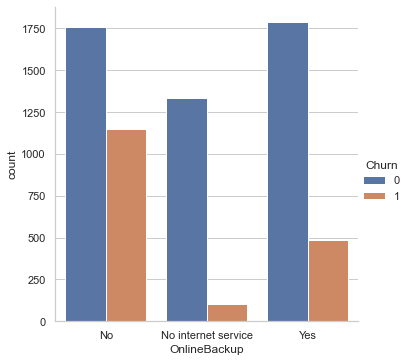

In [55]:
online_backup_churn = new_data[['OnlineBackup', 'Churn']].groupby(['OnlineBackup', 'Churn']).size().reset_index(name='count')
sns.factorplot(x = 'OnlineBackup', y='count', hue='Churn', data=online_backup_churn, kind='bar')
plt.show()

**Insights**
- From a customer churn perspective, customers who have an Online Back-Up service are less likely to churn compared to those who have not opted for an Online Back-Up service.

In [56]:
# Number of missing value
new_data['OnlineBackup'].isnull().sum()

422

#### Imputation Technique

In [57]:
new_data[['InternetService', 'OnlineBackup']].groupby(
    ['InternetService', 'OnlineBackup']).size().reset_index(name='count')

,InternetService,OnlineBackup,count
0,DSL,No,1251
1,DSL,Yes,1015
2,Fiber optic,No,1656
3,Fiber optic,Yes,1261
4,No,No internet service,1438


There is some intuitive pattern we can observe from the above table:
- When InternetService = No then -> OnlineBackup has **No internet Service** instance
- When InternetService in [DSL, Fibre Optic] then -> OnlineBackup has No instance

Imputation Logic:
Internet service instance value is checked across missing values of online backup. 
- If  InternetService != No then OnlineBackup NaN value is imputed with mode of the feature.
- elif InternetService == No then OnlineBackup NaN value is imputed with 'No internet service'.

In [58]:
## Imputing values for 'OnlineBackup' as described above
target_indices_yes = new_data[(new_data['OnlineBackup'].isnull()) & (new_data['InternetService']!='No')].index.values.tolist()
new_data.loc[new_data.index.isin(target_indices_yes), 'OnlineBackup'] = new_data['OnlineBackup'].mode()[0]
    
target_indices_no = new_data[(new_data['OnlineBackup'].isnull()) & (new_data['InternetService']=='No')].index.values.tolist()
new_data.loc[new_data.index.isin(target_indices_no), 'OnlineBackup'] = 'No internet service'


In [59]:
# Number of missing value - No missing values 
new_data['OnlineBackup'].isnull().sum()

0

## Feature: DeviceProtection

In [60]:
new_data['DeviceProtection'].value_counts()

No                     3095
Yes                    2422
No internet service    1526
Name: DeviceProtection, dtype: int64

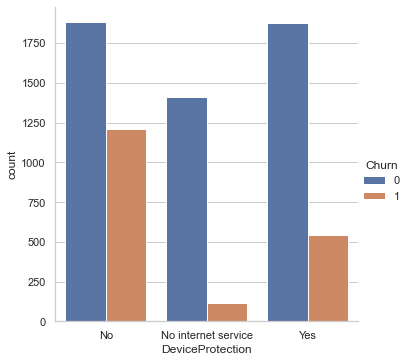

In [61]:
device_protection_churn = new_data[['DeviceProtection', 'Churn']].groupby(['DeviceProtection', 'Churn']).size().reset_index(name='count')
sns.factorplot(x = 'DeviceProtection', y='count', hue='Churn', data=device_protection_churn, kind='bar')
plt.show()

**Insights**
- The customers who opted for No Device Protection has a high frequency of customer churn. Business is performing great in device protection service because there is less churn count for those customers who opted.

In [62]:
# Number of missing value - No missing values 
new_data['DeviceProtection'].isnull().sum()

0

## Feature: TechSupport

In [63]:
new_data['TechSupport'].value_counts()

No                     3473
Yes                    2044
No internet service    1526
Name: TechSupport, dtype: int64

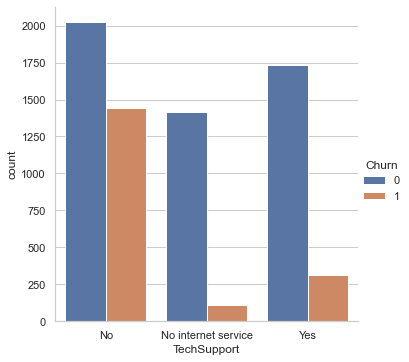

In [64]:
tech_support_churn = new_data[['TechSupport', 'Churn']].groupby(['TechSupport', 'Churn']).size().reset_index(name='count')
sns.factorplot(x = 'TechSupport', y='count', hue='Churn', data=tech_support_churn, kind='bar')
plt.show()

**Insights**
- The customer who opted for No Tech Support has a high frequency of customer churn. Business is performing great in Tech Support because there is less churn count for those customers who opted for tech support.

In [65]:
# Number of missing value - No missing values 
new_data['TechSupport'].isnull().sum()

0

## Feature: StreamingTV

In [66]:
new_data['StreamingTV'].value_counts()

No                     2810
Yes                    2707
No internet service    1526
Name: StreamingTV, dtype: int64

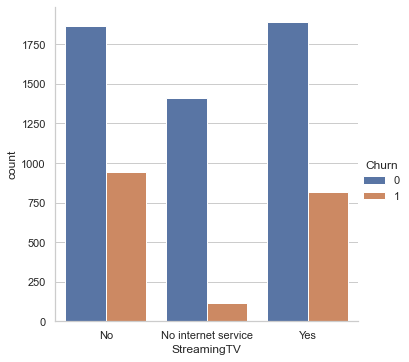

In [67]:
streamingTV_churn = new_data[['StreamingTV', 'Churn']].groupby(['StreamingTV', 'Churn']).size().reset_index(name='count')
sns.factorplot(x = 'StreamingTV', y='count', hue='Churn', data=streamingTV_churn, kind='bar')
plt.show()

**Insights**
- With respect to the churned customer, there are 50-50 chances that they like the Streaming TV services or not.

In [68]:
# Number of missing value - No missing values 
new_data['StreamingTV'].isnull().sum()

0

## Feature: StreamingMovies

In [69]:
new_data['StreamingMovies'].value_counts()

No                     2785
Yes                    2732
No internet service    1526
Name: StreamingMovies, dtype: int64

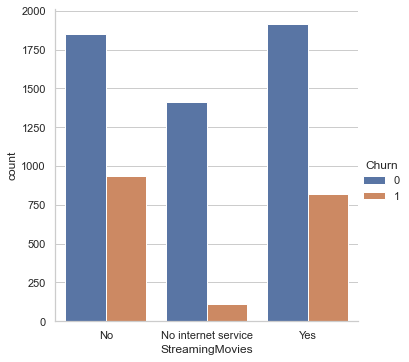

In [70]:
streaming_movies_churn = new_data[['StreamingMovies', 'Churn']].groupby(['StreamingMovies', 'Churn']).size().reset_index(name='count')
sns.factorplot(x = 'StreamingMovies', y='count', hue='Churn', data=streaming_movies_churn, kind='bar')
plt.show()

**Insights**
- With respect to the churned customer, there are 50-50 chances that they like the Streaming Movies services or not. 
- The customer who opted for Streaming Movies has a high non-churned rate, as they are satisfied with the services.

In [71]:
# Number of missing value - No missing values 
new_data['StreamingMovies'].isnull().sum()

0

## Feature: Contract

In [72]:
new_data['Contract'].value_counts()

Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64

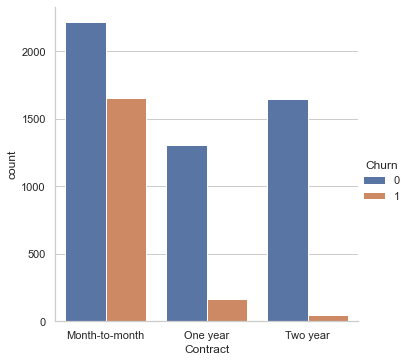

In [73]:
Contract_churn = new_data[['Contract', 'Churn']].groupby(['Contract', 'Churn']).size().reset_index(name='count')
sns.factorplot(x = 'Contract', y='count', hue='Churn', data=Contract_churn, kind='bar')
plt.show()

**Insights**
- The customers who are with the business for the short-term (month-to-month) service plan have high churn instances compared to other contractual services.

In [74]:
# Number of missing value - No missing values 
new_data['Contract'].isnull().sum()

0

## Feature: PaperlessBilling

In [75]:
new_data['PaperlessBilling'].value_counts()

Yes    3938
No     2683
Name: PaperlessBilling, dtype: int64

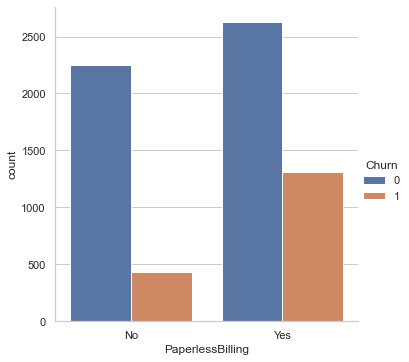

In [76]:
paperless_billing_churn = new_data[['PaperlessBilling', 'Churn']].groupby(['PaperlessBilling', 'Churn']).size().reset_index(name='count')
sns.factorplot(x = 'PaperlessBilling', y='count', hue='Churn', data=paperless_billing_churn, kind='bar')
plt.show()

**Insights**
- The higher number of customers churned who opted for PaperLess Billing services. On contrary, the number non churned customer have also opted for Paperless Billing services.

In [77]:
# Number of missing value
new_data['PaperlessBilling'].isnull().sum()

422

- Since its's a categorical feature and based on the distribution across the different value it appear that mostly customer opted for paperless billing services. We will be imputing the missing value with mode value(i.e **Yes**)

In [78]:
new_data['PaperlessBilling'] = new_data['PaperlessBilling'].replace(np.nan, new_data['PaperlessBilling'].mode()[0])

In [79]:
# Number of missing value 
new_data['MonthlyCharges'].isnull().sum()

0

## Feature: PaymentMethod

In [80]:
new_data['PaymentMethod'].value_counts()

Electronic check             2196
Mailed check                 1514
Credit card (automatic)      1456
Bank transfer (automatic)    1455
Name: PaymentMethod, dtype: int64

<Figure size 1296x2160 with 0 Axes>

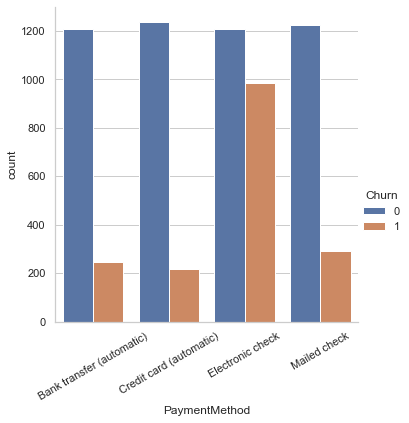

In [81]:
fig = plt.figure(figsize=(18, 30))
payment_method_churn = new_data[['PaymentMethod', 'Churn']].groupby(['PaymentMethod', 'Churn']).size().reset_index(name='count')
g= sns.factorplot(x = 'PaymentMethod', y='count', hue='Churn', data=payment_method_churn, kind='bar')
g.set_xticklabels(rotation=30)
plt.show()

**Insights**
- The highest number of customer churned who paid their bills through electronic check. 
- There is an equal number of payment modes opted by non-churned customers.


In [82]:
# Number of missing value
new_data['PaymentMethod'].isnull().sum()

422

- Since its's a categorical feature and based on the distribution across the different value it appear that electronic check is the most frequently used method. We will be imputing the missing value with mode value(i.e **Electronic check**)

In [83]:
# Imputing the PaymentMethod with the Mode of the Column
new_data['PaymentMethod'] = new_data['PaymentMethod'].replace(np.nan, new_data['PaymentMethod'].mode()[0])

In [84]:
# Number of missing value - There are no missing values
new_data['MonthlyCharges'].isnull().sum()

0

## Feature: MonthlyCharges    

In [85]:
new_data['TotalCharges'].describe()

count    7032.000000
mean     2283.300441
std      2266.771362
min        18.800000
25%       401.450000
50%      1397.475000
75%      3794.737500
max      8684.800000
Name: TotalCharges, dtype: float64

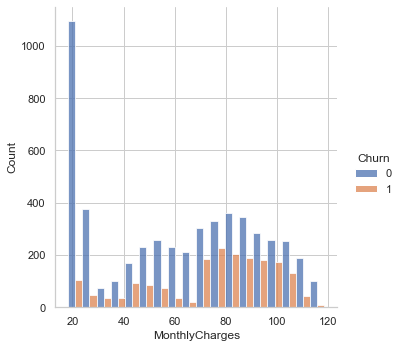

In [86]:
sns.displot(new_data, x='MonthlyCharges', hue='Churn', multiple='dodge')
plt.show()

**Insights**
- Monthly charges distribution reflects that a significant amount of non churned customers pays very less amount fee for their services. We can even observe that the churned customers were paying more monthly charges compared to the non-churned. 

- From the below bar chart, we can observe interesting thing that the average monthly charges paid by the Churned customer are high than non-churned. From the revenue perspective, we can see that **high-paying customers are dropping from the business**, which will impact the gross gain.


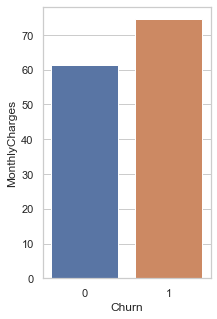

In [87]:
plt.figure(figsize=(3,5))
monthly_charges_churn = new_data[['MonthlyCharges', 'Churn']].groupby(['Churn']).mean('MonthlyCharges').reset_index()
sns.barplot(x=monthly_charges_churn['Churn'], y=monthly_charges_churn['MonthlyCharges'])
plt.show()

In [88]:
# Number of missing value - There are no missing values
new_data['MonthlyCharges'].isnull().sum()

0

## Feature: TotalCharge

In [89]:
new_data['TotalCharges'].describe()

count    7032.000000
mean     2283.300441
std      2266.771362
min        18.800000
25%       401.450000
50%      1397.475000
75%      3794.737500
max      8684.800000
Name: TotalCharges, dtype: float64

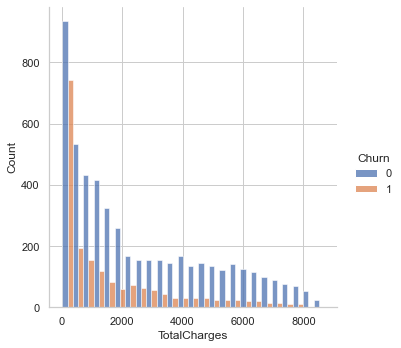

In [90]:
sns.displot(new_data, x='TotalCharges', hue='Churn', multiple='dodge')
fig.show()

**Insights**
- From the above chart, we see that relatively higher and lower total charges are paid,by customers who didn't churn compared to the ones who did. 

The distribution of the total charges shows high skewness towards the right and, from the distribution plot, we can see that there are a significant amount of outliers(due to max value = 8684) in the data.

 - From the above chart, we see that the average total charges paid by the customer who didn't churn are significantly higher than those who did. This might be because of the fewer number of churned customer and directly reflect the imbalance in the target variable(Churn=1)

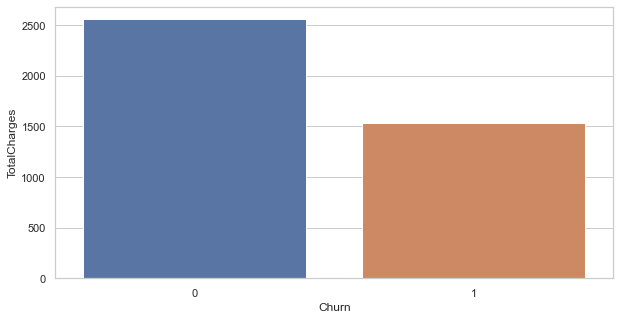

In [91]:
total_charges_churn = new_data[['TotalCharges', 'Churn']].groupby(['Churn']).mean('TotalCharges').reset_index()
sns.barplot(x=total_charges_churn['Churn'], y=total_charges_churn['TotalCharges'])
plt.show()

In [92]:
# Number of missing value
new_data['TotalCharges'].isnull().sum()

11

From the above distribution we can see that TotalCharge Variable is Skewed Right.
- **Mean**: Will not be the right imputation techniques for this variable. From the above data we can see that feature is highly influenced by the **Outlier[max value = 8684]** and mean is highly sensitive toward the outliers.
- **Mode**: Will not be the right imputation techniques for this variable. Mode is  used to impute missing values in columns which are categorical in nature.But when it comes to continuous data then mode can create ambiguities.
- **Median**: **Will be right imputation technique**. Median is not influenced by the outliers of the dataset.

In [93]:
# Imputing the TotalCharges with the Median=1397.475000 of the data
new_data['TotalCharges'] = new_data['TotalCharges'].replace(np.nan, new_data['TotalCharges'].median())

In [94]:
# Number of missing value - There are no missing values
new_data['MonthlyCharges'].isnull().sum()

0

In [95]:
# checking the final table after imputation
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   float64
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [96]:
new_data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1.000000,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,0,No,No,34.000000,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,Male,0,No,No,32.451291,Yes,No,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,Male,0,No,No,45.000000,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Electronic check,42.30,1840.75,0
4,Female,0,No,No,2.000000,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


### Data Transformation

- One Hot Encoding

In [97]:
# Mapping of binary variable to 0 and 1
new_data['gender'] = new_data["gender"].apply(lambda x: 0 if x=='Female' else 1).astype(int)
new_data['Partner'] = new_data["Partner"].apply(lambda x: 0 if x=='No' else 1).astype(int)
new_data['Dependents'] = new_data["Dependents"].apply(lambda x: 0 if x=='No' else 1).astype(int)
new_data['PhoneService'] = new_data["PhoneService"].apply(lambda x: 0 if x=='No' else 1).astype(int)
new_data['PaperlessBilling'] = new_data["PaperlessBilling"].apply(lambda x: 0 if x=='No' else 1).astype(int)

In [98]:
# converting all the categorical variables into dummy variables
df_dummies = pd.get_dummies(new_data)
df_dummies.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1.000000,0,1,29.85,29.85,0,...,1,0,0,1,0,0,0,0,1,0
1,1,0,0,0,34.000000,1,0,56.95,1889.50,0,...,1,0,0,0,1,0,0,0,0,1
2,1,0,0,0,32.451291,1,1,53.85,108.15,1,...,1,0,0,1,0,0,0,0,0,1
3,1,0,0,0,45.000000,0,0,42.30,1840.75,0,...,1,0,0,0,1,0,0,0,1,0
4,0,0,0,0,2.000000,1,1,70.70,151.65,1,...,1,0,0,1,0,0,0,0,1,0


In [99]:
df_dummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 41 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   gender                                   7043 non-null   int32  
 1   SeniorCitizen                            7043 non-null   int64  
 2   Partner                                  7043 non-null   int32  
 3   Dependents                               7043 non-null   int32  
 4   tenure                                   7043 non-null   float64
 5   PhoneService                             7043 non-null   int32  
 6   PaperlessBilling                         7043 non-null   int32  
 7   MonthlyCharges                           7043 non-null   float64
 8   TotalCharges                             7043 non-null   float64
 9   Churn                                    7043 non-null   int32  
 10  MultipleLines_No                         7043 no

#### Raw data has 7043 rows and 41 columns after processing. Satisfying the project requirement

In [100]:
df_dummies.shape

(7043, 41)

## Final Data Preparation for Machine Learning

#### Content
- BaseLine Model
- Underlying Assumption
- HyperParamter Tuning
- Model Evaluation
- Model Visualization


### BaseLine Model

**Why Standard Scaler, not Min_max scaler?**
- Outliers can skew a probability distribution and make data scaling difficult as the calculated mean and standard deviation will be skewed by the presence of the outlier.
One approach to standardizing input variables in the presence of outliers to ignore the outliers from the calculation of the mean and standard deviation, then use the calculated values to scale the variable.
So, Standardizing the data due to the presence of skewed distributions and outliers.

In [101]:
X = df_dummies.drop('Churn', axis = 1)
y = df_dummies['Churn']
# Splitting data into train and test and Applying Standarization Technique
X_train_org, X_test_org, y_train, y_test = train_test_split(X, y, random_state = 0)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train_org)
X_test = scaler.transform(X_test_org)

Running **Logistic Model** as BaseLine Model

In [102]:
LogReg_clf = LogisticRegression(C=0.1).fit(X_train, y_train)
pred_logreg = LogReg_clf.predict(X_test)
print("BaseLine Model train_score- Accuracy: {:.2f}".format(LogReg_clf.score(X_train, y_train)))
print("BaseLine Model test_score- Accuracy: {:.2f}".format(LogReg_clf.score(X_test, y_test)))

BaseLine Model train_score- Accuracy: 0.80
BaseLine Model test_score- Accuracy: 0.79


In [103]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred_logreg, target_names=["Not_Churn", "Churn"]))

              precision    recall  f1-score   support

   Not_Churn       0.84      0.89      0.86      1298
       Churn       0.63      0.51      0.56       463

    accuracy                           0.79      1761
   macro avg       0.73      0.70      0.71      1761
weighted avg       0.78      0.79      0.78      1761



Here, comparing the Baseline model with the Dummy Classifier( Most Frequent) will always predict the most frequent class label in the training data.
- From the Accuracy, we can see that Logistic Regression Macro Average is equal to the Most Frequent strategy classifier i.e 74%. This means that the baseline model, predicting the actual churn customer(churn=1) as they will not churn in the future(chrun=0).
Definitely, **Accuracy is not the best evaluation parameter** for this problem.

In [104]:
from sklearn.dummy import DummyClassifier

dummy_majority = DummyClassifier(strategy='most_frequent')
dummy_majority.fit(X_train, y_train)

pred_most_frequent = dummy_majority.predict(X_test)

print("Unique predicted labels: {}".format(np.unique(pred_most_frequent)))
print("Test score: {:.2f}".format(dummy_majority.score(X_test, y_test)))

Unique predicted labels: [0]
Test score: 0.74


### Underlying Assumptions
- **False Negative(FN)** - Classifier will predict customers that they will not churn in the future but in actual they will churn in the future. FN is most problematic as a business has to pay all the costs of acquiring a replacement customer, including foregone revenue, advertising costs, administrative costs, etc. Acquiring a new customer is always costly than acquiring a new one.
- **False Positive(FN)** -Classifier will predict customers that they will churn in the future but, in actual they will not churn in the future.FN is not problematic for businesses as they are ready to pay some $0.01  for each customer in a later campaign.

#### Why chosen roc_auc score?
A ROC curve looks pretty good (ie better than random) while misclassifying most or all of the minority class.
In contrast, PR curves are specifically tailored for the detection of rare events and are pretty useful in those scenarios. 
They will show that your classifier has a low performance if it is misclassifying most or all of the minority class. But they don't translate well to more balanced cases or cases where negatives are rare.

In our context Sensitivity (TPR) is used to see how many of the positive cases are correctly picked up (minimizing the proportion missed as false negatives = FNR) while Specificity (TNR) is used to see how many of the negative cases are correctly eliminated (minimizing the proportion found as false positives = FPR). 
Our dataset indicates the imbalance with high negative/No Churn. Thus if we always predict negative you have an Accuracy of 0.999999 - this is achieved by the simple naive algorithm that simply predicts the maximum class.
ROC Curves summarize the trade-off between the true positive rate and false-positive rate for a predictive model using different probability thresholds.


#### Functions Description: 
Looped through five classifiers: Logistic Regression, K-Nearest Neighbors, Support Vector Classifier with LinearSVC,Support Vector Classifier with linear_Kernel, Support Vector Classifier with Radial Kernel, Support Vector Classifier with Poly Kernel and, Decision Tree.

### HyperParamter Tuning

In [105]:
def specify_models():
    """
    This function returns a list of dictionaries with each dictionary containing the 'name', 'class' and 
    'parameters' information of the different ML models
    """

    knear={'name':'K Nearest Neighbors Classifier',
           'class':sklearn.neighbors.KNeighborsClassifier(),
            'parameters':{'n_neighbors':range(1,5)}
          }
    logistic ={'name':"Logistic Regression",
         'class':sklearn.linear_model.LogisticRegression(),
         'parameters':{'C':[0.001,0.01,0.1,1,10],"penalty":["l1","l2"]}
        }
    linear_svc={'name':'Support Vector Classifier with LinearSVC',
               'class':sklearn.svm.LinearSVC(),
                'parameters':{'C':[0.001,0.01,0.1,1,10]}
          }
    sv_linear={'name':'Support Vector Classifier with linear_Kernel',
               'class':sklearn.svm.SVC(kernel='linear'),
                'parameters':{'C':[0.001,0.01,0.1,1,10]}
          }

    sv_radial={'name':'Support Vector Classifier with Radial Kernel',
               'class':sklearn.svm.SVC(kernel='rbf'),
                'parameters':{'C':[0.001,0.01,0.1,1],'gamma':[0.01,0.1,1,10]}
          }
    sv_poly={'name':'Support Vector Classifier with Poly Kernel',
               'class':sklearn.svm.SVC(kernel='poly'),
                'parameters':{'C':[0.001,0.01],'gamma':[0.01,0.1,1], 'degree':[1,2]}
          }
    decis_tree={'name':"Decision Tree Classifier",
            'class':sklearn.tree.DecisionTreeClassifier(),
            'parameters':{'max_depth':range(2,5)}
            }

    model_list = list([knear,logistic,linear_svc,sv_linear,sv_radial,sv_poly,decis_tree])
    return(model_list)

#### Which GridsearchCv metric is good for imbalanced data?
GridsearchCv- iterate the model through the grid of model parameters. Run script to train the model on each Training CV fold (created below and then find classification report by evaluating against the rest of the Training data (not the Test).
GridSearch to optimize hyperparameters across five cross-validation sets for a given model. 
I decided to use the Compute Area Under the **Receiver Operating Characteristic Curve (ROC AUC) score** to determine model performance to try and maximize true positives while minimizing false positives in model predictions.
As in our dataset, there is an issue of high Imbalance in data.

In [106]:
def train_model(model_dict, X_train, y_train, X_test, y_test, metric = 'roc_auc', k = 5):
    """
    This function trains the individual model using different hyperparamters by performing grid-search to identify the best
    model parameters, and finally computes evaluation metrics on the train and test data.
    
    Args:
    model_dict: Dictionary containing the 'name', 'class' and 'parameters' information of the ML model.
    X_train: Predictors in training data
    y_train: Target Label in training data
    X_test: Predictors in test data
    y_test: Target Label in test data
    metric: metric to evaluate the model upon
    k: k-fold value for cross-validation
    
    Returns:
    Dictionary containing model name, model performance (train and test score), best-parameters for a given model.
    
    """
    name=model_dict['name']
    param_grid = model_dict['parameters']
    
    clf=GridSearchCV(estimator=model_dict["class"], param_grid=param_grid, cv= k, scoring=metric)
    clf.fit(X_train, y_train)
    results_dict = {}
    
    results_dict['Classifier_Name'] = name    
    results_dict['Classifier'] = clf.best_estimator_
    results_dict['Best_Params'] = clf.best_params_
    results_dict['Roc_Auc_Train'] = clf.best_score_
    if results_dict['Classifier_Name'] in ['K Nearest Neighbors Classifier','Logistic Regression','Decision Tree Classifier']:
        pred_prob_train = results_dict['Classifier'].predict_proba(X_train)[:, 1]
        pred_prob = results_dict['Classifier'].predict_proba(X_test)[:, 1]
        
    else:
    #'Support Vector Classifier with Poly Kernel','Support Vector Classifier with Radial Kernel',
    #'Support Vector Classifier with linear_Kernel','Support Vector Classifier with LinearSVC']
        pred_prob_train = results_dict['Classifier'].decision_function(X_train)
        pred_prob = results_dict['Classifier'].decision_function(X_test)
        
    #Train Score and Evaluation Parameter
    results_dict['Train_Score'] =  roc_auc_score(y_train, pred_prob_train)
    fpr, tpr, threshold = roc_curve(y_train, pred_prob_train)
    results_dict['FalsePositive_Train'] = fpr
    results_dict['TruePostive_Train'] = tpr


    # Test Score and Evaluation Parameter
    results_dict['Test_Score'] =  roc_auc_score(y_test, pred_prob)
    fpr1, tpr1, threshold1 = roc_curve(y_test, pred_prob)
    results_dict['FalsePositive_Test'] = fpr1
    results_dict['TruePostive_Test'] = tpr1

    return(results_dict)

In [107]:
def train_all_models(models, X_train, y_train, X_test, y_test, metric ='roc_auc', k = 5):
    """
    This function iterates over the list of models that get eventually trained by invoking train_model function 
    
    Args:
    models: Dictionary containing the 'name', 'class' and 'parameters' information of the ML model.
    X_train: Predictors in training data
    y_train: Target Label in training data
    X_test: Predictors in test data
    y_test: Target Label in test data
    metric: metric to evaluate the model upon
    k: k-fold value for cross-validation
    
    Returns:
    DataFrame which contains the model name, model performance (train and test score), best-parameters for all the models.
    """
    final_list = []

    for i in range(0,len(models)):
        tr_model = train_model(models[i] ,X_train, y_train, X_test, y_test)
        final_list.append(tr_model)

    #Sort the final table of model in decending order "Test_Score": Model which return the highest Test_score is at top
    final_dataframe=pd.DataFrame(final_list).sort_values(by='Test_Score', ascending = False)
    return final_dataframe

### Model Evaluation

Here we will check the best parameter value of each model with their Roc_Auc score acoss train and test data

In [108]:

model = specify_models()
result_table = train_all_models(model,X_train, y_train,X_test, y_test)
result_table[['Classifier_Name','Classifier','Best_Params','Train_Score','Test_Score']]

,Classifier_Name,Classifier,Best_Params,Train_Score,Test_Score
1,Logistic Regression,LogisticRegression(C=0.01),"{'C': 0.01, 'penalty': 'l2'}",0.848003,0.823646
2,Support Vector Classifier with LinearSVC,LinearSVC(C=0.001),{'C': 0.001},0.846000,0.818718
3,Support Vector Classifier with linear_Kernel,"SVC(C=0.001, kernel='linear')",{'C': 0.001},0.841924,0.813057
5,Support Vector Classifier with Poly Kernel,"SVC(C=0.001, degree=1, gamma=1, kernel='poly')","{'C': 0.001, 'degree': 1, 'gamma': 1}",0.841924,0.813057
6,Decision Tree Classifier,DecisionTreeClassifier(max_depth=4),{'max_depth': 4},0.842966,0.809949
4,Support Vector Classifier with Radial Kernel,"SVC(C=0.01, gamma=0.01)","{'C': 0.01, 'gamma': 0.01}",0.837359,0.803411
0,K Nearest Neighbors Classifier,KNeighborsClassifier(n_neighbors=4),{'n_neighbors': 4},0.904865,0.742680


##### From the below metric we can see that:
- Best Model: Logistic Regression
- Best Parameter: 'C': 1, 'penalty': 'l2' - Lasso Regression(penalty equal to the square of the magnitude of coefficients)
- Train Score: 85%
- Test Score: 82%

From the chart, we can see that K Nearest Neighbors there might be the case of overfitting because of high variation in the train and test scores. From the train Perspective we can say that KNN will perform better only on train set.
- Train Score: 90%
- Test Score: 74%

### Model Visualization

Lets see the Roc Curve for Train and Test Dataset across all the Models

From ROC curve acorss all the model we can clearly see that KNN under-perform on the test dataset due to overfitting and Logistic Regression perfomed well compared to all other models in the dataset

- Train Roc Curve

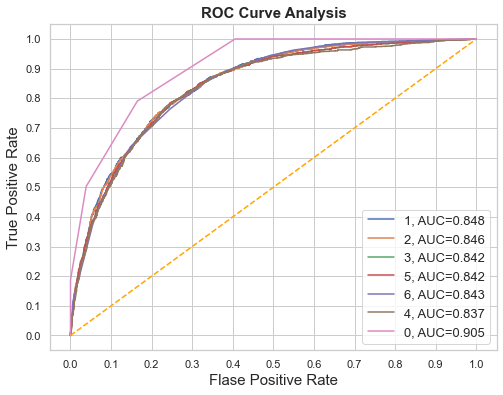

In [109]:
fig = plt.figure(figsize=(8,6))

for i in result_table.index:
    plt.plot(result_table.loc[i]['FalsePositive_Train'], 
             result_table.loc[i]['TruePostive_Train'], 
             label="{}, AUC={:.3f}".format(i, result_table.loc[i]['Train_Score']))
    
plt.plot([0,1], [0,1], color='orange', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("Flase Positive Rate", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)

plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')

plt.show()

- Test Roc Curve

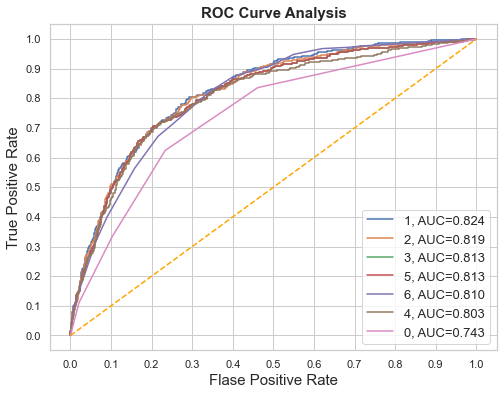

In [110]:
fig = plt.figure(figsize=(8,6))

for i in result_table.index:
    plt.plot(result_table.loc[i]['FalsePositive_Test'], 
             result_table.loc[i]['TruePostive_Test'], 
             label="{}, AUC={:.3f}".format(i, result_table.loc[i]['Test_Score']))
    
plt.plot([0,1], [0,1], color='orange', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("Flase Positive Rate", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)

plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')

plt.show()

#### Re-training the model on the entire dataset with the best model parameters obtained from above step using HyperParameter tunning

In [111]:
X_scaled = scaler.transform(X)

In [112]:
final_logistic = LogisticRegression(penalty = 'l2', C = 1, solver = 'lbfgs', max_iter = 500).fit(X_scaled, y)